In [22]:
import os
import pickle 
import numpy as np
from elasticsearch import Elasticsearch
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime 
import urllib
sns.set()

%matplotlib inline

In [2]:
tpc_str = 'refugee'
cum_doc_cnt = '41500'

s = pickle.load(open(os.path.join('../data', 'concept_stats.'+tpc_str+'.'+str(cum_doc_cnt)+'.pkl'), 'rb'))
#{'df_concept':df_concept}
df_concept = s['df_concept']

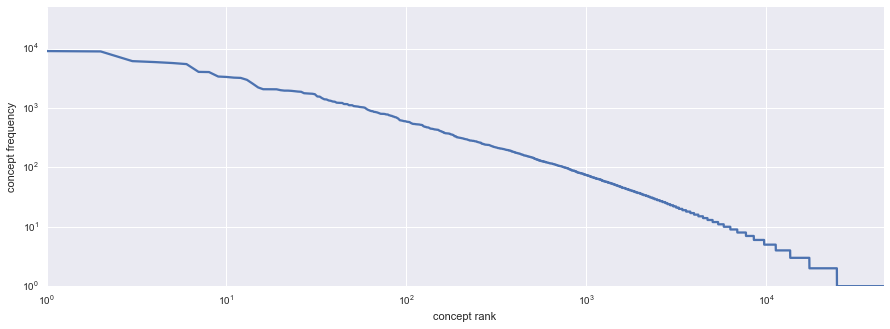

In [3]:
plt.figure(figsize=(15, 5))

ax1 = plt.subplot(1, 1, 1)
sns.set_context("talk", font_scale=1.)
sns.set_style("whitegrid")

ax1.autoscale(enable=True, tight=True)
ax1.loglog([i for i in range(len(df_concept))], df_concept['count'])
ax1.set_xlabel('concept rank')
ax1.set_ylabel('concept frequency')

In [4]:
istart = 200
iend = 225
place_ent = []
other_ent = []
for idx in range(istart, iend):
    if df_concept.iloc[idx]['DBpedia:Place']:
        place_ent.append( df_concept.index[idx] )
        ax1.plot(idx, df_concept.iloc[idx]['count'], 'x', mec='b')
    else:
        other_ent.append( df_concept.index[idx] )
        ax1.plot(idx, df_concept.iloc[idx]['count'], 'x', mec='r')

In [5]:
df_concept.iloc[200:225, :]

,count,DBpedia:Place,DBpedia:Country,DBpedia:City,DBpedia:Organisation,DBpedia:Person,DBpedia:Company,DBpedia:Work,DBpedia:OfficeHolder,DBpedia:Event,DBpedia:EthnicGroup,DBpedia:Disease,DBpedia:MilitaryConflict,DBpedia:MusicalWork,Other,NA
Starbucks,313,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
Television,312,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
Association_football,311,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
New_York,310,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
Judge,308,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
Hawaii,308,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
Posttraumatic_stress_disorder,307,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
Social_media,306,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
Refugee_Week,304,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
Famine,304,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [6]:
df_concept.head()

,count,DBpedia:Place,DBpedia:Country,DBpedia:City,DBpedia:Organisation,DBpedia:Person,DBpedia:Company,DBpedia:Work,DBpedia:OfficeHolder,DBpedia:Event,DBpedia:EthnicGroup,DBpedia:Disease,DBpedia:MilitaryConflict,DBpedia:MusicalWork,Other,NA
Refugee,49661,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
Syria,9059,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0
Twitter,8933,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
Refugees_of_the_Syrian_Civil_War,6135,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
Federal_government_of_the_United_States,5914,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [10]:
df_concept.ix['Passport']

count                       296
DBpedia:Place                 0
DBpedia:Country               0
DBpedia:City                  0
DBpedia:Organisation          0
DBpedia:Person                0
DBpedia:Company               0
DBpedia:Work                  0
DBpedia:OfficeHolder          0
DBpedia:Event                 0
DBpedia:EthnicGroup           0
DBpedia:Disease               0
DBpedia:MilitaryConflict      0
DBpedia:MusicalWork           0
Other                         0
NA                            1
Name: Passport, dtype: int64

In [16]:
df_concept.loc[(df_concept['count'] >= 500) & (df_concept['count'] <= 1000)]

,count,DBpedia:Place,DBpedia:Country,DBpedia:City,DBpedia:Organisation,DBpedia:Person,DBpedia:Company,DBpedia:Work,DBpedia:OfficeHolder,DBpedia:Event,DBpedia:EthnicGroup,DBpedia:Disease,DBpedia:MilitaryConflict,DBpedia:MusicalWork,Other,NA
Donald_Trump,962,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
Town,934,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
Sweden,915,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0
India,897,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0
Poland,884,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0
FIDE,881,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
English_language,859,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
Language,856,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
CNN,848,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
God,838,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [19]:
aa = list(df_concept.loc[(df_concept['count'] >= 500) & (df_concept['count'] <= 1000)].index)

In [20]:
bb = [s.lower().replace('_', ' ') for s in aa]

In [21]:
bb

['donald trump',
 'town',
 'sweden',
 'india',
 'poland',
 'fide',
 'english language',
 'language',
 'cnn',
 'god',
 'mediterranean sea',
 'right of asylum',
 'london',
 'safety',
 'human rights',
 'health',
 'society',
 'world refugee day',
 'region',
 'persecution',
 'islamic state of iraq and the levant',
 'health care',
 'reuters',
 'kenya',
 '2017',
 'christian',
 'barack obama',
 'deportation',
 'palestinian refugee',
 'democratic republic of the congo',
 'culture',
 'angela merkel',
 'hungary',
 'racism',
 'bashar al-assad',
 'airport',
 'calais',
 'water',
 'world war ii',
 'elmo',
 'email',
 'jews',
 'iran',
 'associated press',
 'yemen',
 'united states department of homeland security',
 'democracy',
 'eritrea',
 'politics of iran',
 'high commissioner',
 'government agency',
 'pakistan',
 'charitable organization',
 'forced migration',
 'climate change',
 'ethiopia',
 'washington, d.c.',
 'egypt',
 'film',
 'family (biology)',
 'poverty',
 'islamism',
 'itunes',
 'vetting']

In [23]:
urllib.request('http://www.image-net.org/api/text/wordnet.synset.getwords?wnid=n01882714')

TypeError: 'module' object is not callable